<a href="https://colab.research.google.com/github/rahat-shanto/AI/blob/main/Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install imbalanced-learn

In [3]:
pip install tensorflow

In [4]:
pip install scikeras

In [5]:
pip install xgboost

In [6]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [7]:
file_path =("/content/mental-health-in-tech-survey.csv")
df = pd.read_csv(file_path)
df

Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0                No       Yes          Often            6-25  ...   
1                No        No         Rarely  More than 1000  ...   
2                No        No         Rarely            6-25  ...   
3               Yes       Yes          Often          26-100  ...   
4                No        No          Never         100-500  ...   
...             ...       ...            ...             ...  ...   
1254             No       Yes            NaN          26-100  ...   
1255            Yes       Yes          Often          26-100  ...   
1256            Yes       Yes      Sometimes  More than 1000  ...   
1257             No        No            NaN         100-500  ...   
1258            Yes       Yes      Sometimes          26-100  ...   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence comments  
0                    Maybe                Yes              No      NaN  
1                       No         Don't know              No      NaN  
2                      Yes                 No              No      NaN  
3                    Maybe                 No             Yes      NaN  
4                      Yes         Don't know              No      NaN  
...                    ...                ...             ...      ...  
1254                    No         Don't know              No      NaN  
1255    

In [8]:
df = df.drop(['Timestamp'], axis=1)
df.head(5)

Age  Gender         Country state self_employed family_history treatment  \
0   37  Female   United States    IL           NaN             No       Yes   
1   44       M   United States    IN           NaN             No        No   
2   32    Male          Canada   NaN           NaN             No        No   
3   31    Male  United Kingdom   NaN           NaN            Yes       Yes   
4   31    Male   United States    TX           NaN             No        No   

  work_interfere    no_employees remote_work  ...               leave  \
0          Often            6-25          No  ...       Somewhat easy   
1         Rarely  More than 1000          No  ...          Don't know   
2         Rarely            6-25          No  ...  Somewhat difficult   
3          Often          26-100          No  ...  Somewhat difficult   
4          Never         100-500         Yes  ...          Don't know   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                        No                      No  Some of them        Yes   
1                     Maybe                      No            No         No   
2                        No                      No           Yes        Yes   
3                       Yes                     Yes  Some of them         No   
4                        No                      No  Some of them        Yes   

  mental_health_interview phys_health_interview mental_vs_physical  \
0                      No                 Maybe                Yes   
1                      No                    No         Don't know   
2                     Yes                   Yes                 No   
3                   Maybe                 Maybe                 No   
4                     Yes                   Yes         Don't know   

  obs_consequence comments  
0              No      NaN  
1              No      NaN  
2              No      NaN  
3             Yes      NaN  
4              No      NaN  

[5 rows x 26 columns]

In [9]:
df.tail(5)

Age Gender         Country state self_employed family_history treatment  \
1254   26   male  United Kingdom   NaN            No             No       Yes   
1255   32   Male   United States    IL            No            Yes       Yes   
1256   34   male   United States    CA            No            Yes       Yes   
1257   46      f   United States    NC            No             No        No   
1258   25   Male   United States    IL            No            Yes       Yes   

     work_interfere    no_employees remote_work  ...               leave  \
1254            NaN          26-100          No  ...       Somewhat easy   
1255          Often          26-100         Yes  ...  Somewhat difficult   
1256      Sometimes  More than 1000          No  ...  Somewhat difficult   
1257            NaN         100-500         Yes  ...          Don't know   
1258      Sometimes          26-100          No  ...          Don't know   

     mental_health_consequence phys_health_consequence     coworkers  \
1254                        No                      No  Some of them   
1255                        No                      No  Some of them   
1256                       Yes                     Yes            No   
1257                       Yes                      No            No   
1258                     Maybe                      No  Some of them   

        supervisor mental_health_interview phys_health_interview  \
1254  Some of them                      No                    No   
1255           Yes                      No                    No   
1256            No                      No                    No   
1257            No                      No                    No   
1258            No                      No                    No   

     mental_vs_physical obs_consequence comments  
1254         Don't know              No      NaN  
1255                Yes              No      NaN  
1256                 No              No      NaN  
1257                 No              No      NaN  
1258         Don't know              No      NaN  

[5 rows x 26 columns]

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
df.isnull().sum()

Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [12]:
df.value_counts('comments')

comments
* Small family business - YMMV.                                                                                                                                                        5
                                                                                                                                                                                       1
(yes but the situation was unusual and involved a change in leadership at a very high level in the organization as well as an extended leave of absence)                               1
-                                                                                                                                                                                      1
A close family member of mine struggles with mental health so I try not to stigmatize it. My employers/coworkers also seem compassionate toward any kind of health or family needs.    1
                                                                                                                                                                                      ..
it is my opinion that bad mental health is a red flag for employers and i would never bring it up.                                                                                     1
password: testered                                                                                                                                                                     1
suffer from CR-PTSD so all answered based on that                                                                                                                                      1
thanks for what you're doing. FYI these questions dont quite work for entrepreneurs where employer == cofounders / sr mgmt / me                                                        1
you rock for doing this!                                                                                                                                                               1
Name: count, Length: 160, dtype: int64

In [13]:
df.value_counts('obs_consequence')

obs_consequence
No     1075
Yes     184
Name: count, dtype: int64

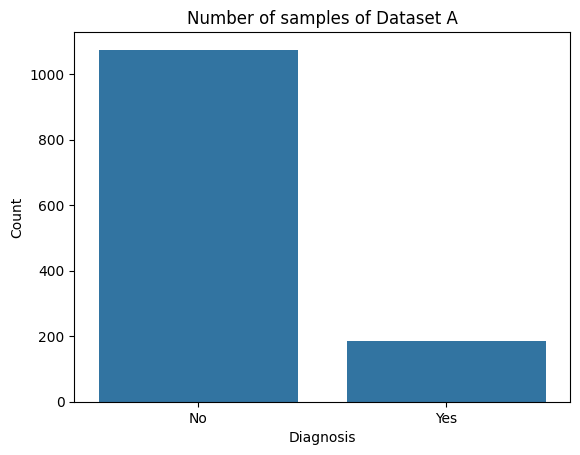

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='obs_consequence', data=df)
plt.title('Number of samples of Dataset A')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.savefig('Number of samples of Dataset A.pdf', bbox_inches='tight')
plt.show()

In [15]:
df = df[df['obs_consequence'] != 'ckd\t']
df.value_counts('obs_consequence')

obs_consequence
No     1075
Yes     184
Name: count, dtype: int64

In [16]:
x = df.drop(columns=['obs_consequence'])

In [17]:
df.head()

Age  Gender         Country state self_employed family_history treatment  \
0   37  Female   United States    IL           NaN             No       Yes   
1   44       M   United States    IN           NaN             No        No   
2   32    Male          Canada   NaN           NaN             No        No   
3   31    Male  United Kingdom   NaN           NaN            Yes       Yes   
4   31    Male   United States    TX           NaN             No        No   

  work_interfere    no_employees remote_work  ...               leave  \
0          Often            6-25          No  ...       Somewhat easy   
1         Rarely  More than 1000          No  ...          Don't know   
2         Rarely            6-25          No  ...  Somewhat difficult   
3          Often          26-100          No  ...  Somewhat difficult   
4          Never         100-500         Yes  ...          Don't know   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                        No                      No  Some of them        Yes   
1                     Maybe                      No            No         No   
2                        No                      No           Yes        Yes   
3                       Yes                     Yes  Some of them         No   
4                        No                      No  Some of them        Yes   

  mental_health_interview phys_health_interview mental_vs_physical  \
0                      No                 Maybe                Yes   
1                      No                    No         Don't know   
2                     Yes                   Yes                 No   
3                   Maybe                 Maybe                 No   
4                     Yes                   Yes         Don't know   

  obs_consequence comments  
0              No      NaN  
1              No      NaN  
2              No      NaN  
3             Yes      NaN  
4              No      NaN  

[5 rows x 26 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [24]:
# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Now apply one-hot encoding
df_encoded = pd.get_dummies(
    df,
    columns=[
        'leave',
        'mental_health_consequence',
        'phys_health_consequence',
        'coworkers',
        'supervisor',
        'mental_health_interview',
        'phys_health_interview',
        'mental_vs_physical',
        'obs_consequence',
        'comments'
    ],
    drop_first=True
)

df_encoded.head()

Age  Gender         Country state self_employed family_history treatment  \
0   37  Female   United States    IL           NaN             No       Yes   
1   44       M   United States    IN           NaN             No        No   
2   32    Male          Canada   NaN           NaN             No        No   
3   31    Male  United Kingdom   NaN           NaN            Yes       Yes   
4   31    Male   United States    TX           NaN             No        No   

  work_interfere    no_employees remote_work  ...  \
0          Often            6-25          No  ...   
1         Rarely  More than 1000          No  ...   
2         Rarely            6-25          No  ...   
3          Often          26-100          No  ...   
4          Never         100-500         Yes  ...   

  comments_Would you bring up a mental health issue with a potential employer in an interview?Poignant.  \
0                                              False                                                      
1                                              False                                                      
2                                              False                                                      
3                                              False                                                      
4                                              False                                                      

  comments_YOU MAY WANT TO THROW OUT MY ENTRY.I answered all of these questions with the assumption that Attention Deficit Disorder is considered a mental illness and with ADD in mind.  \
0                                              False                                                                                                                                       
1                                              False                                                                                                                                       
2                                              False                                                                                                                                       
3                                              False                                                                                                                                       
4                                              False                                                                                                                                       

  comments_as a UK-based company we don't have any medical provisions as it's all provided on the National Health Service (for now!) However if we do need to take days off for any kind of health problems everyone is understanding :)  \
0                                              False                                                                                                                                                                                       
1                                              False                                                                                                                                                                                       
2                                              False                                                                                                                                                                                       
3                                              False                                                                                                                                                                                       
4                                              False                                                                                                                                                                                       

  comments_fwiw I am

In [25]:
# Convert 'bool' columns to int (True -> 1, False -> 0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Convert 'object' columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all values are strings
    df[col] = label_encoder.fit_transform(df[col])

# Check the result
print(df.head())
print(df.dtypes)

   Age  Gender  Country  state  self_employed  family_history  treatment  \
0   37      10       45     10              2               0          1   
1   44      16       45     11              2               0          0   
2   32      20        7     45              2               0          0   
3   31      20       44     45              2               1          1   
4   31      20       45     37              2               0          0   

   work_interfere  no_employees  remote_work  ...  leave  \
0               1             4            0  ...      2   
1               2             5            0  ...      0   
2               2             4            0  ...      1   
3               1             2            0  ...      1   
4               0             1            1  ...      0   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                          1                        1          1           2   
1                     

In [26]:
df.tail()

Age  Gender  Country  state  self_employed  family_history  treatment  \
1254   26      39       44     45              0               0          1   
1255   32      20       45     10              0               1          1   
1256   34      39       45      2              0               1          1   
1257   46      33       45     22              0               0          0   
1258   25      20       45     10              0               1          1   

      work_interfere  no_employees  remote_work  ...  leave  \
1254               4             2            0  ...      2   
1255               1             2            1  ...      1   
1256               3             5            0  ...      1   
1257               4             1            1  ...      0   
1258               3             2            0  ...      0   

      mental_health_consequence  phys_health_consequence  coworkers  \
1254                          1                        1          1   
1255                          1                        1          1   
1256                          2                        2          0   
1257                          2                        1          0   
1258                          0                        1          1   

      supervisor  mental_health_interview  phys_health_interview  \
1254           1                        1                      1   
1255           2                        1                      1   
1256           0                        1                      1   
1257           0                        1                      1   
1258           0                        1                      1   

      mental_vs_physical  obs_consequence  comments  
1254                   0                0       156  
1255                   2                0       156  
1256                   1                0       156  
1257                   1                0       156  
1258                   0                0       156  

[5 rows x 26 columns]

In [27]:
num_cols = df.shape[1]

print("Number of columns:", num_cols)

Number of columns: 26


In [28]:
num_cols = len(df.columns)  # ❌ This gives an integer

In [29]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

Age
Skew : 35.48


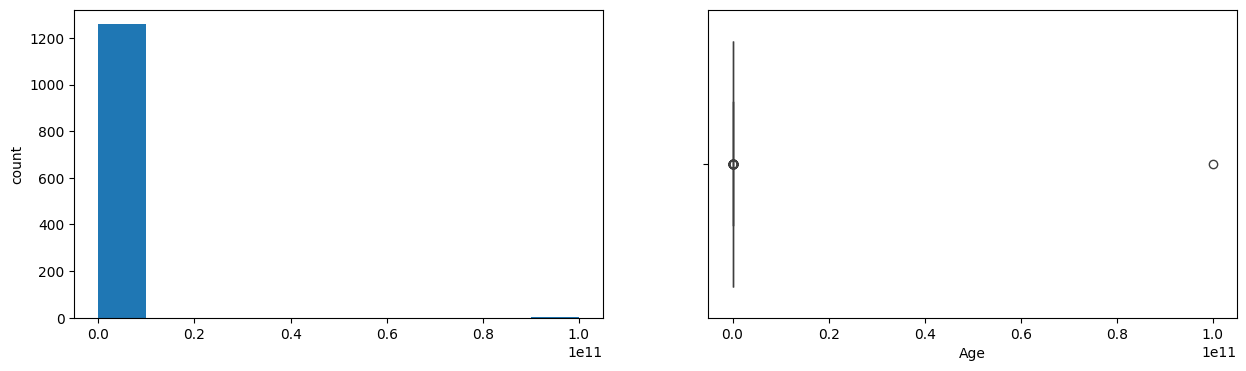

Gender
Skew : 0.57


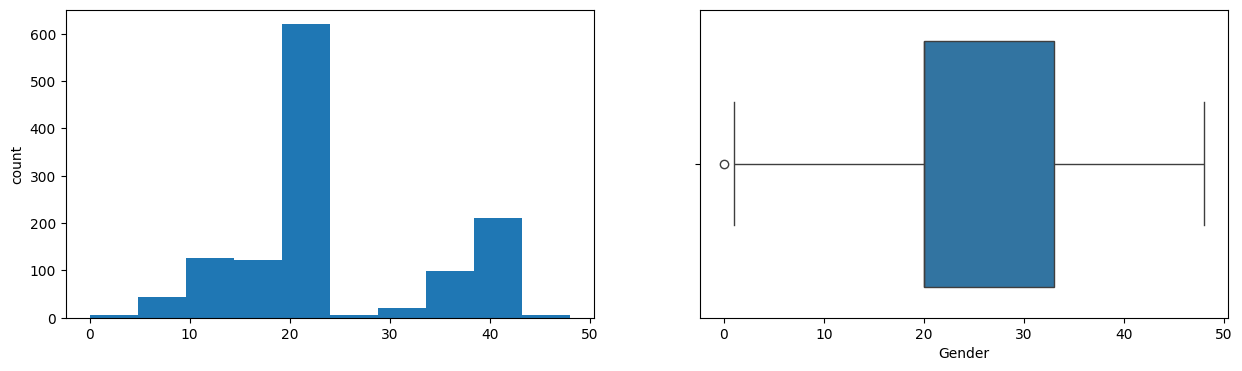

Country
Skew : -1.62


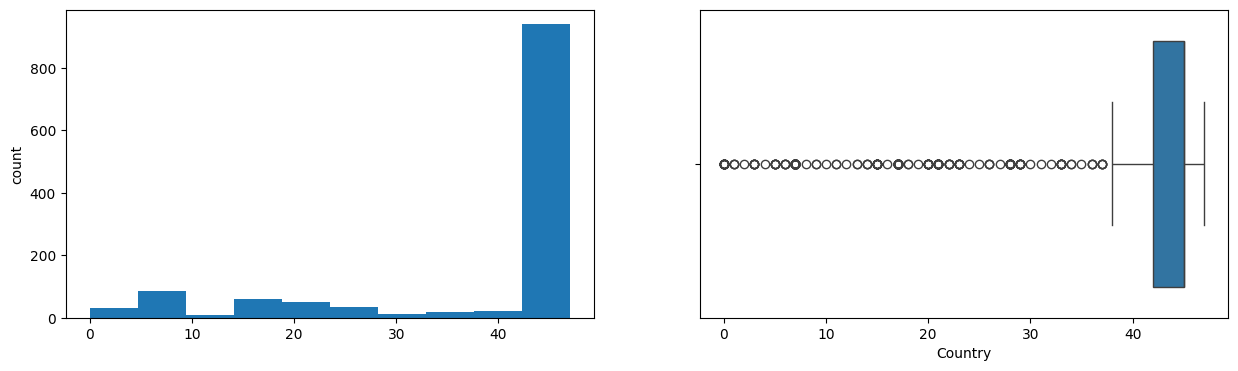

state
Skew : -0.79


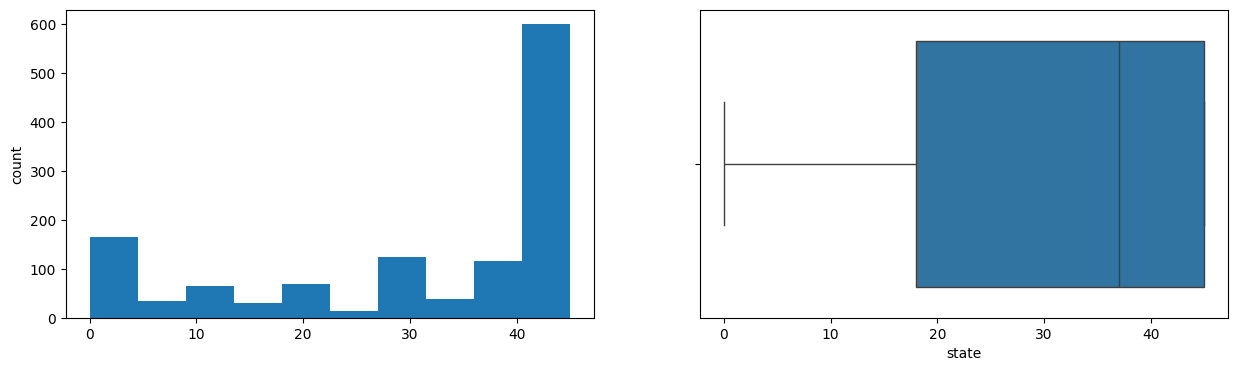

self_employed
Skew : 2.72


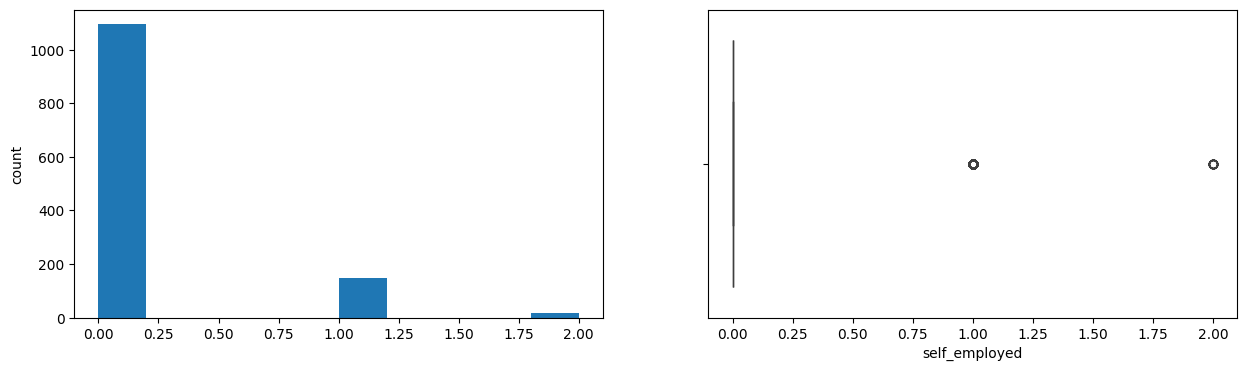

family_history
Skew : 0.45


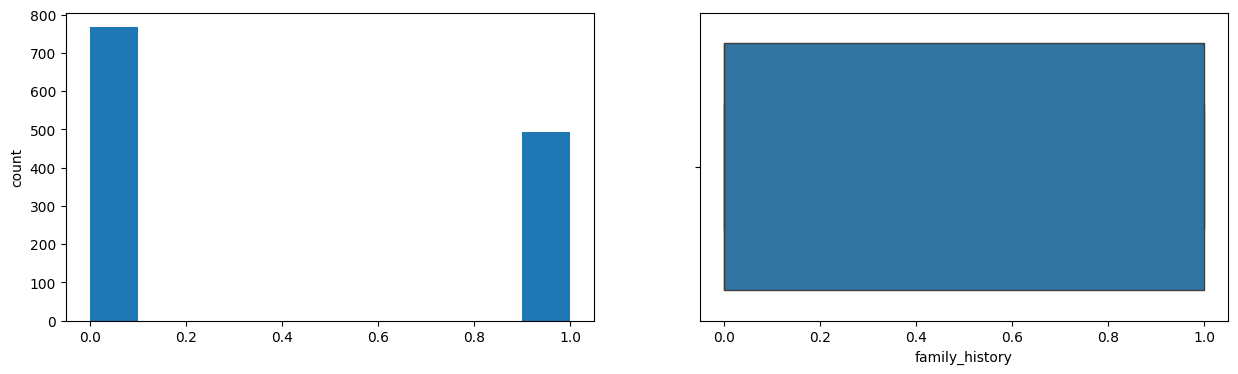

treatment
Skew : -0.02


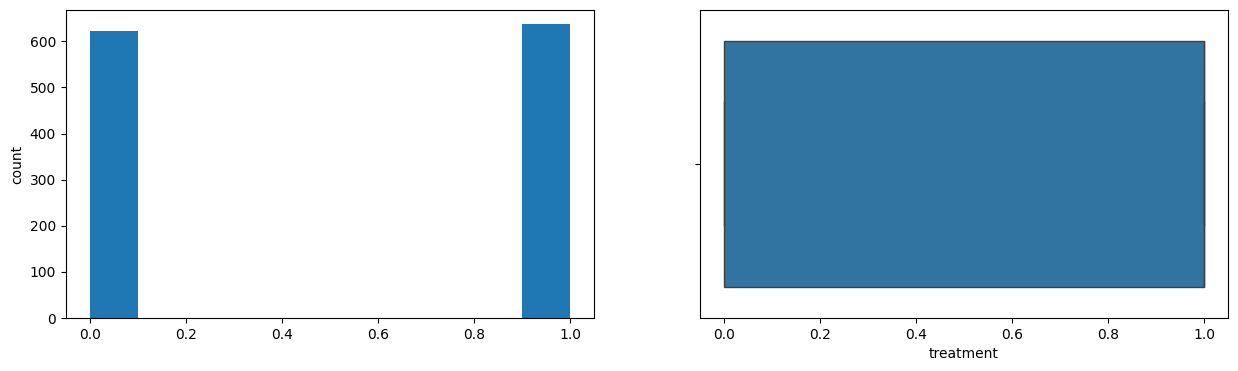

work_interfere
Skew : -0.53


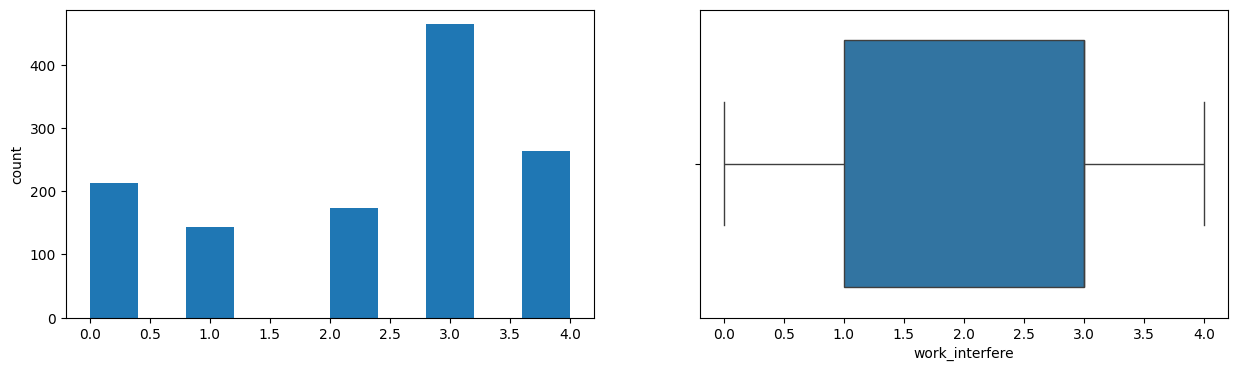

no_employees
Skew : -0.16


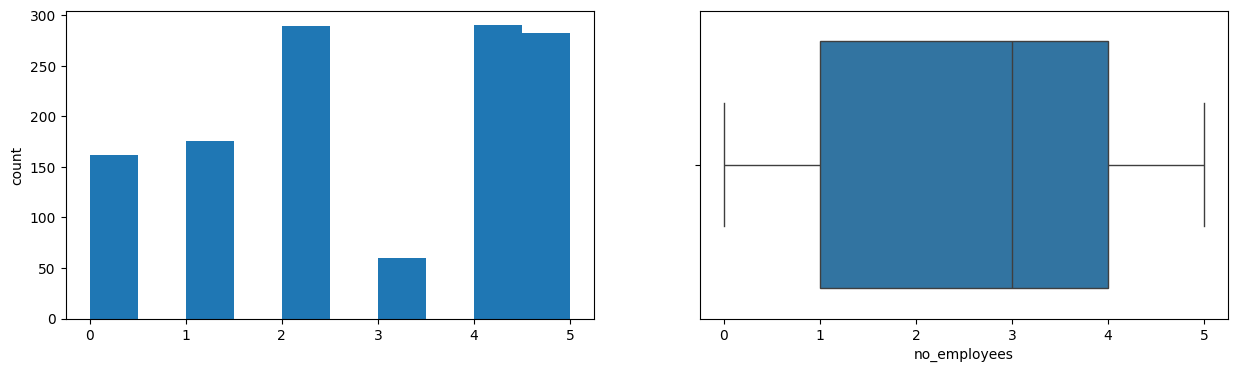

remote_work
Skew : 0.88


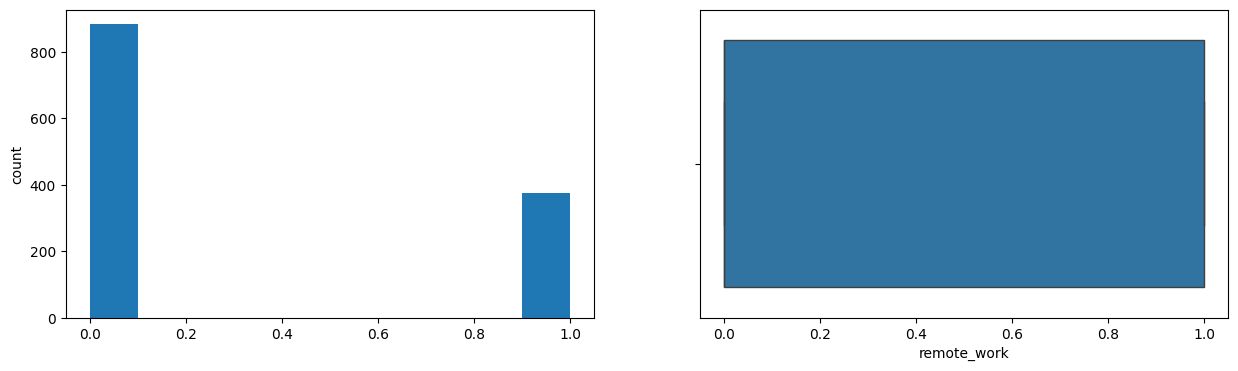

tech_company
Skew : -1.66


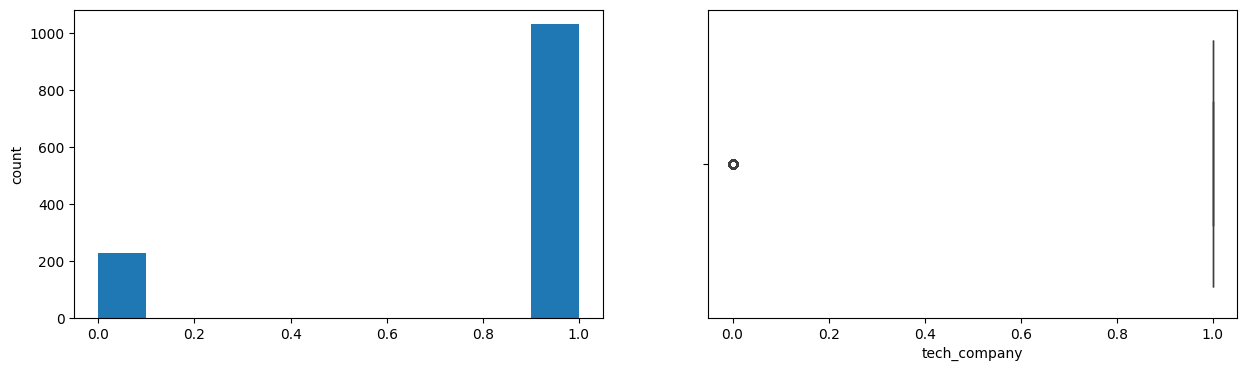

benefits
Skew : -0.1


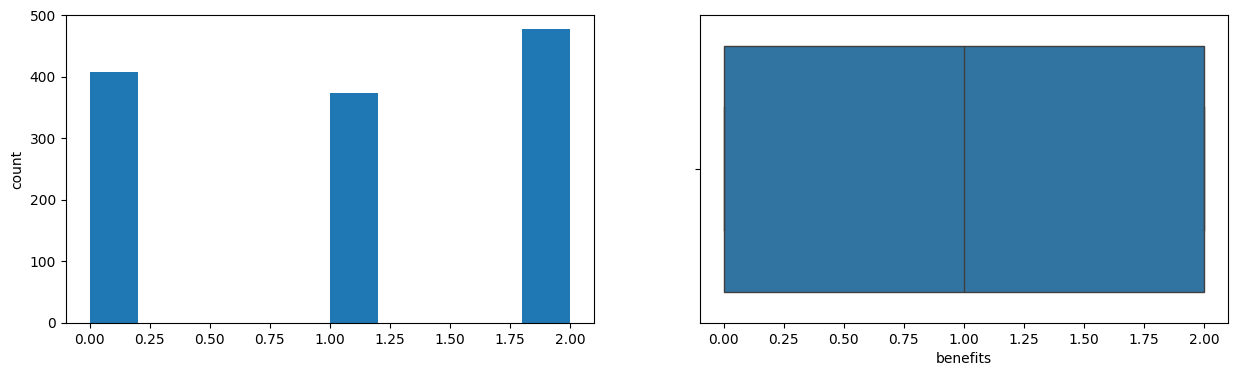

care_options
Skew : 0.09


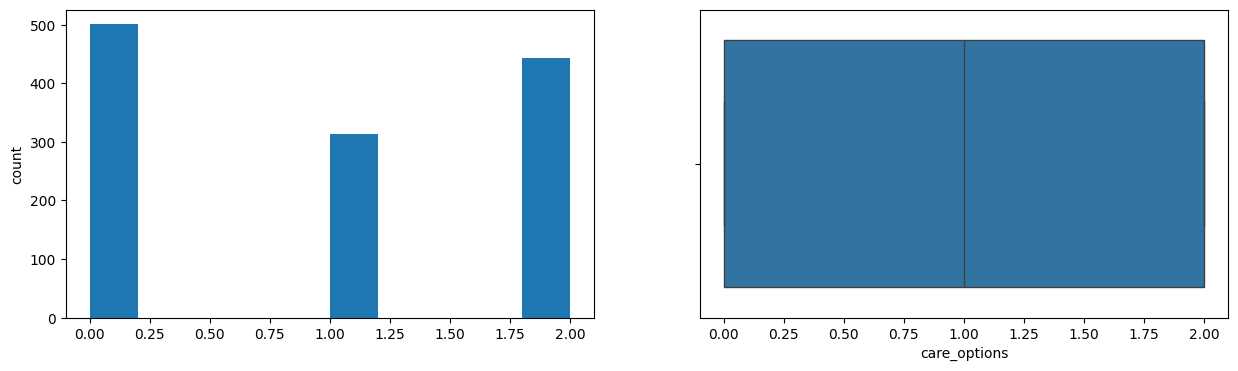

wellness_program
Skew : 0.0


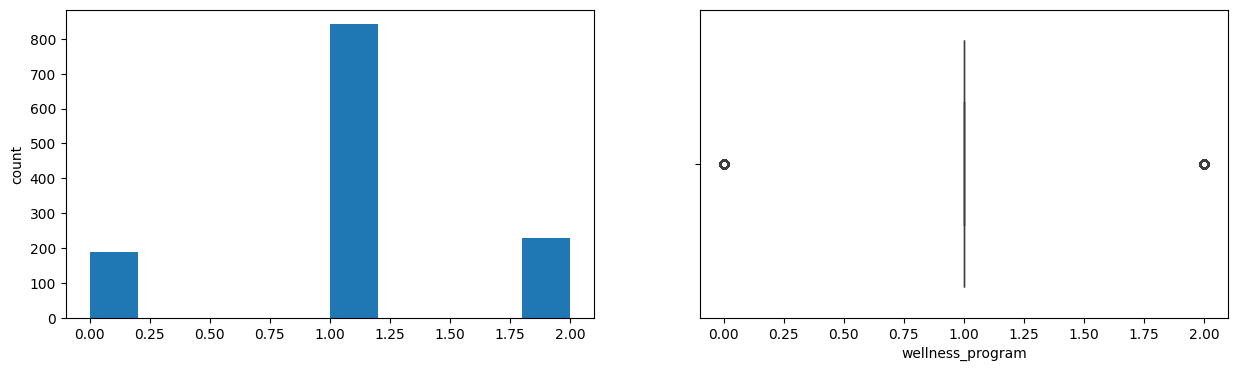

seek_help
Skew : 0.12


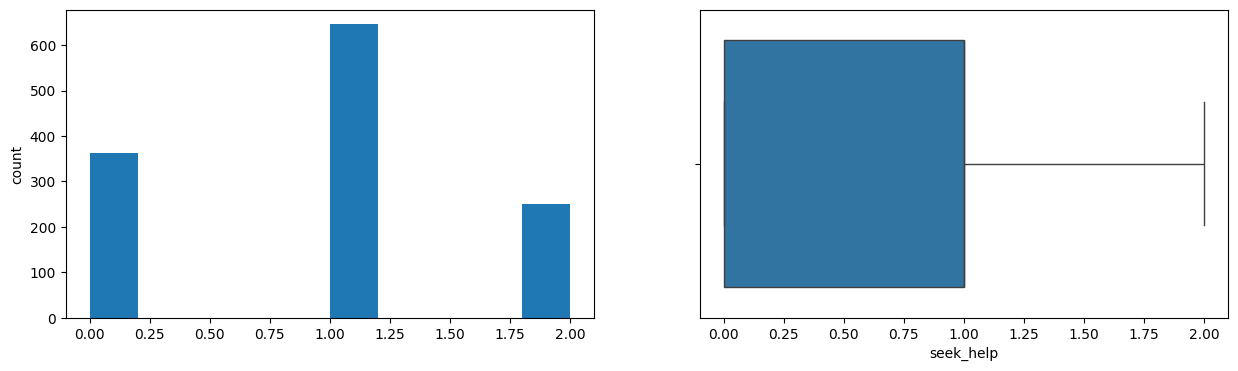

anonymity
Skew : 0.75


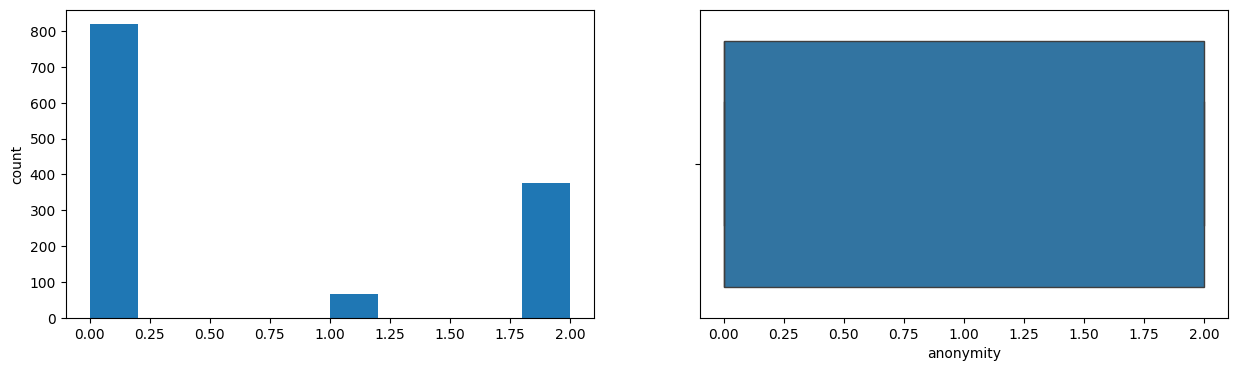

leave
Skew : 0.56


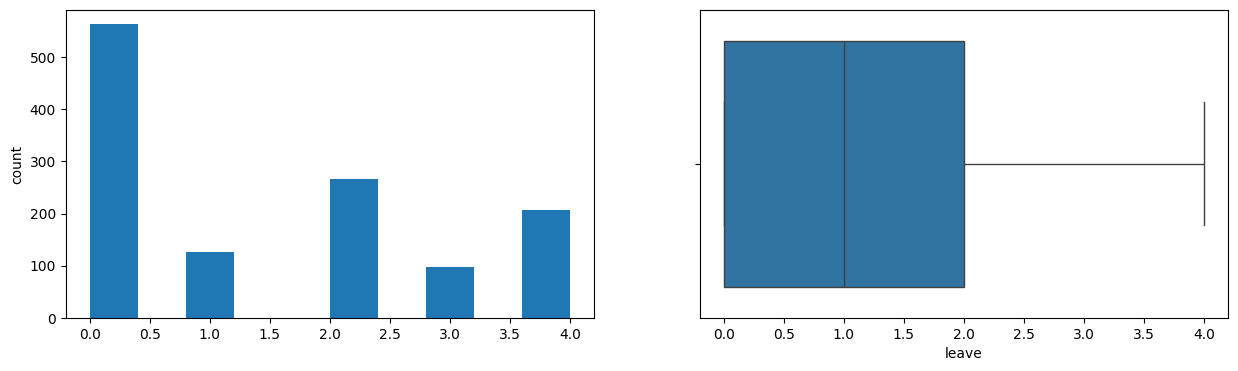

mental_health_consequence
Skew : 0.26


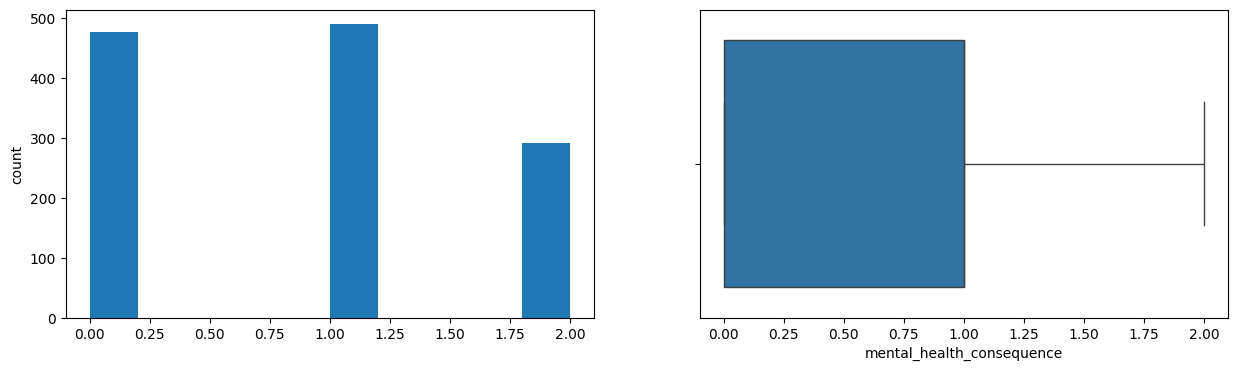

phys_health_consequence
Skew : -0.38


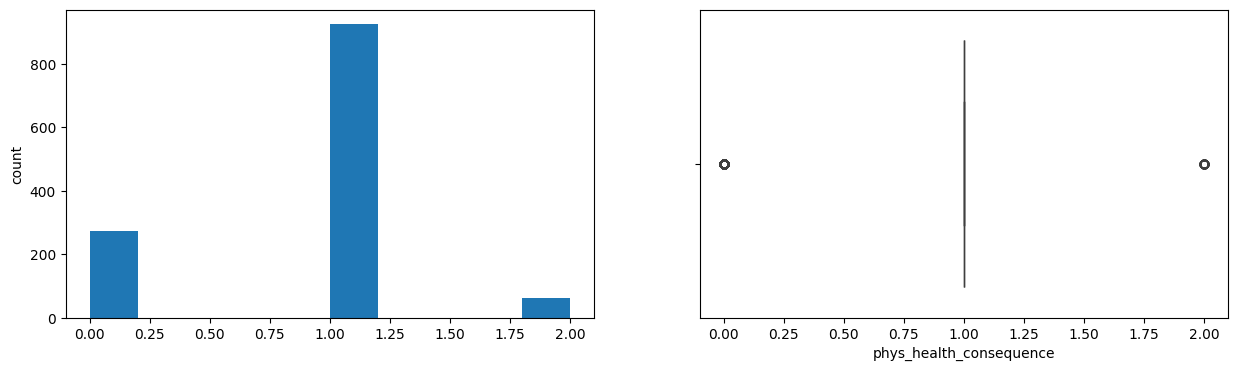

coworkers
Skew : 0.02


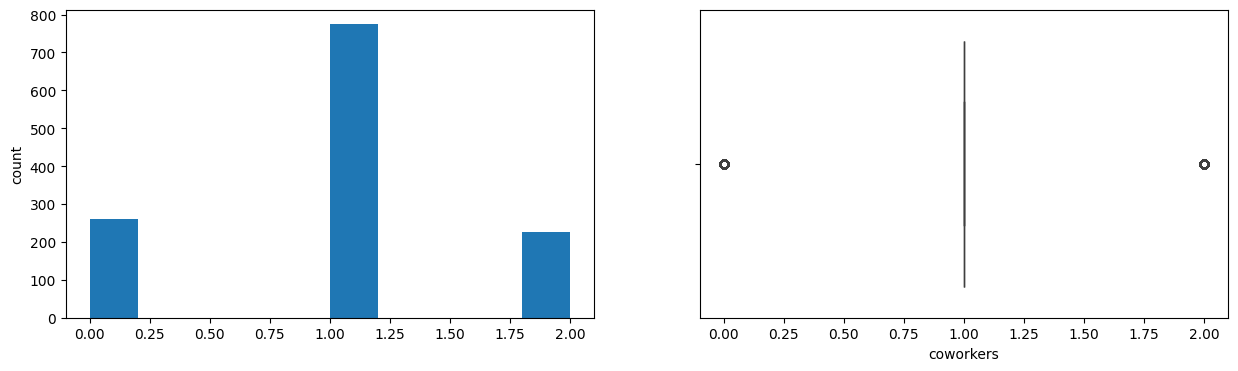

supervisor
Skew : -0.19


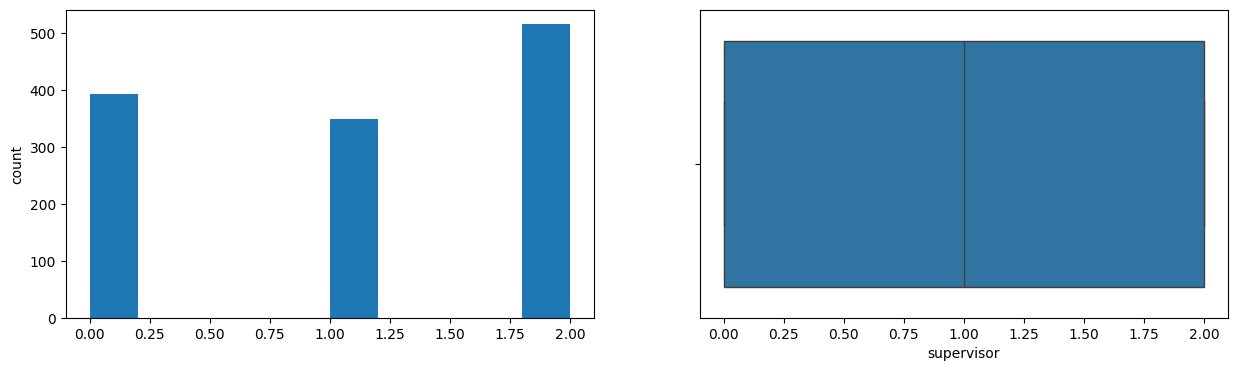

mental_health_interview
Skew : -0.72


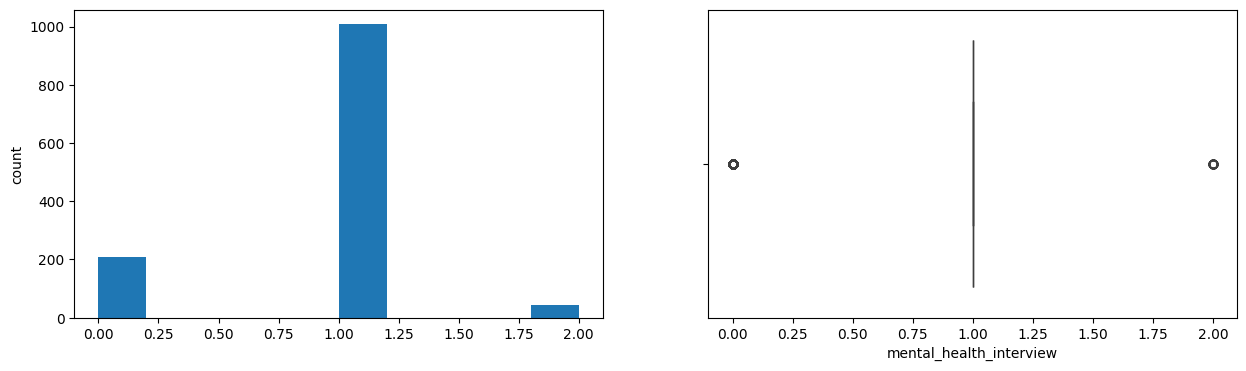

phys_health_interview
Skew : 0.48


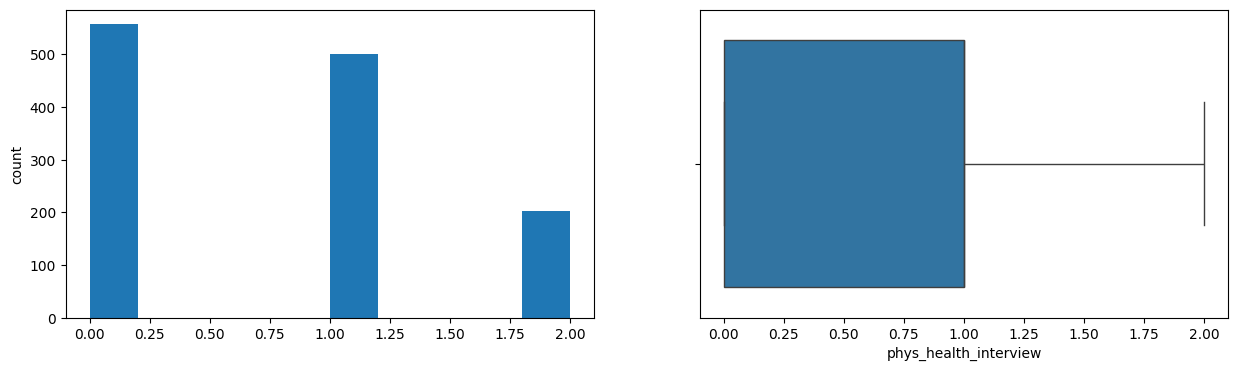

mental_vs_physical
Skew : 0.36


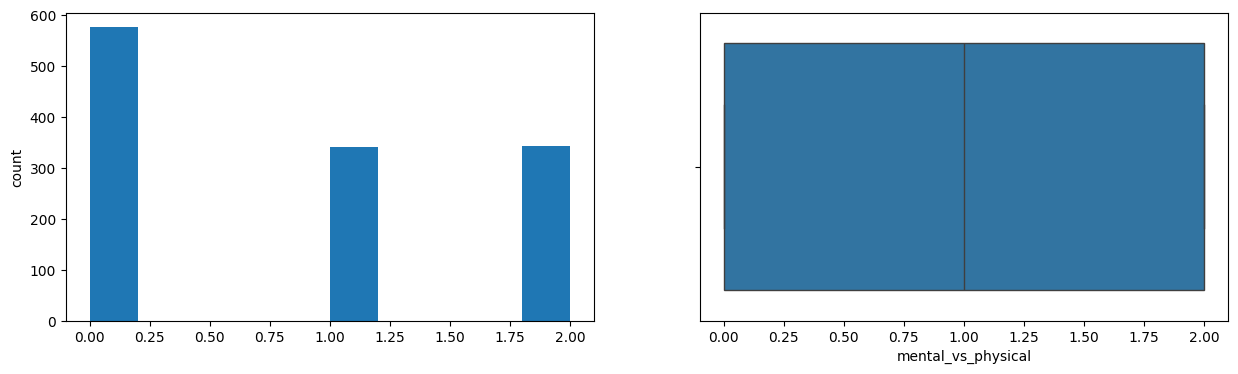

obs_consequence
Skew : 2.01


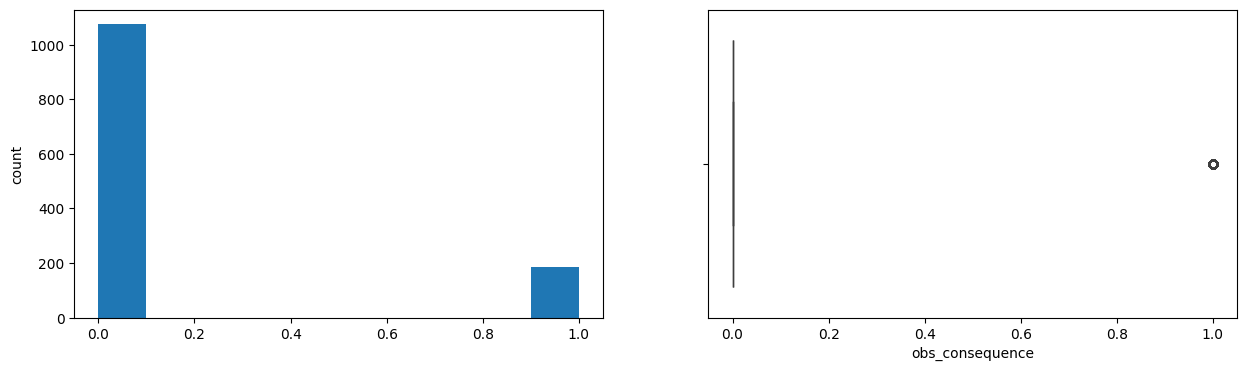

comments
Skew : -3.22


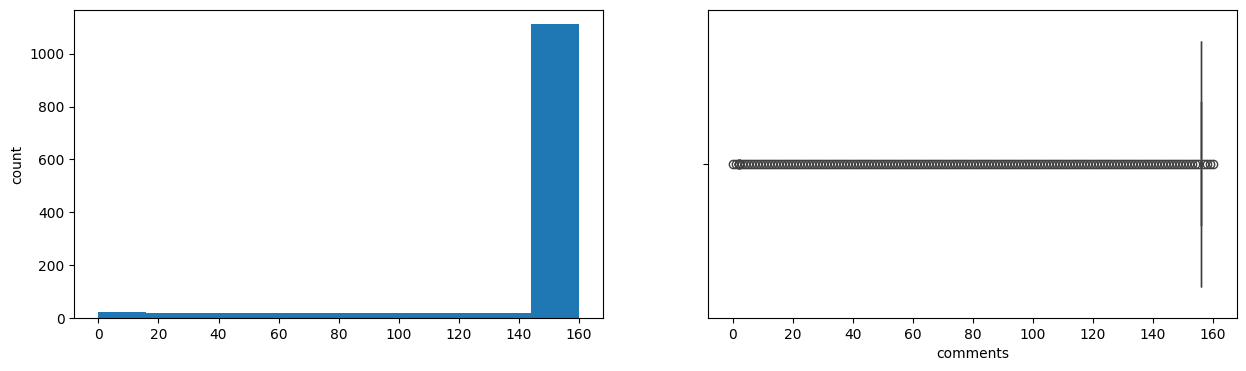

In [30]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [32]:
df.columns = df.columns.str.strip()

In [34]:
# Split features (X) and target (y)
X = df.drop(columns=['treatment'])
y = df['treatment']

In [35]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Clean column names
df.columns = df.columns.str.strip()

# 2. Define features (X) and target (y)
X = df.drop(columns=['treatment'])   # Target is treatment
y = df['treatment']

# 3. One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Impute missing values (only numeric columns now)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 6. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8253968253968254
Precision: 0.7883211678832117
Recall: 0.8780487804878049
F1 Score: 0.8307692307692308


In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Accuracy: 0.7261904761904762
Precision: 0.725
Recall: 0.7073170731707317
F1 Score: 0.7160493827160493


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the metrics
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy: 0.6944444444444444
Precision: 0.6796875
Recall: 0.7073170731707317
F1 Score: 0.6932270916334662


In [45]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the metrics
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Accuracy: 0.7103174603174603
Precision: 0.7083333333333334
Recall: 0.6910569105691057
F1 Score: 0.6995884773662552


In [47]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

# Print the metrics
print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")

Accuracy: 0.8253968253968254
Precision: 0.7883211678832117
Recall: 0.8780487804878049
F1 Score: 0.8307692307692308


In [49]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb= f1_score(y_test, y_pred_nb)

# Print the metrics
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

Accuracy: 0.5158730158730159
Precision: 1.0
Recall: 0.008130081300813009
F1 Score: 0.016129032258064516


In [51]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm= f1_score(y_test, y_pred_svm)

# Print the metrics
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Accuracy: 0.7341269841269841
Precision: 0.7089552238805971
Recall: 0.7723577235772358
F1 Score: 0.7392996108949417


In [53]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

Accuracy: 0.7857142857142857
Precision: 0.7555555555555555
Recall: 0.8292682926829268
F1 Score: 0.7906976744186046


In [55]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_predictions = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5510 - loss: 0.6826 - val_accuracy: 0.6587 - val_loss: 0.6334
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6768 - loss: 0.6157 - val_accuracy: 0.6905 - val_loss: 0.6118
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7373 - loss: 0.5730 - val_accuracy: 0.6984 - val_loss: 0.5952
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7147 - loss: 0.5681 - val_accuracy: 0.6984 - val_loss: 0.5838
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7472 - loss: 0.5421 - val_accuracy: 0.6984 - val_loss: 0.5774
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7451 - loss: 0.5232 - val_accuracy: 0.7063 - val_loss: 0.5689
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7298 - loss: 0.5432 - val_accuracy: 0.6984 - val_loss: 0.5628
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7536 - loss: 0.5356 - val_accuracy: 0.7063 - val

In [56]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred_lstm = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5939 - loss: 0.6898 - val_accuracy: 0.6508 - val_loss: 0.6767
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6835 - loss: 0.6541 - val_accuracy: 0.6944 - val_loss: 0.6197
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7058 - loss: 0.5890 - val_accuracy: 0.7103 - val_loss: 0.5806
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7296 - loss: 0.5311 - val_accuracy: 0.7183 - val_loss: 0.5659
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7652 - loss: 0.4948 - val_accuracy: 0.7381 - val_loss: 0.5501
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7598 - loss: 0.5168 - val_accuracy: 0.7262 - val_loss: 0.5356
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7774 - loss: 0.4781 - val_accuracy: 0.7500 - val_loss: 0.5125
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8077 - loss: 0.4148 - val_accuracy: 0.7421 - val_loss: 0.

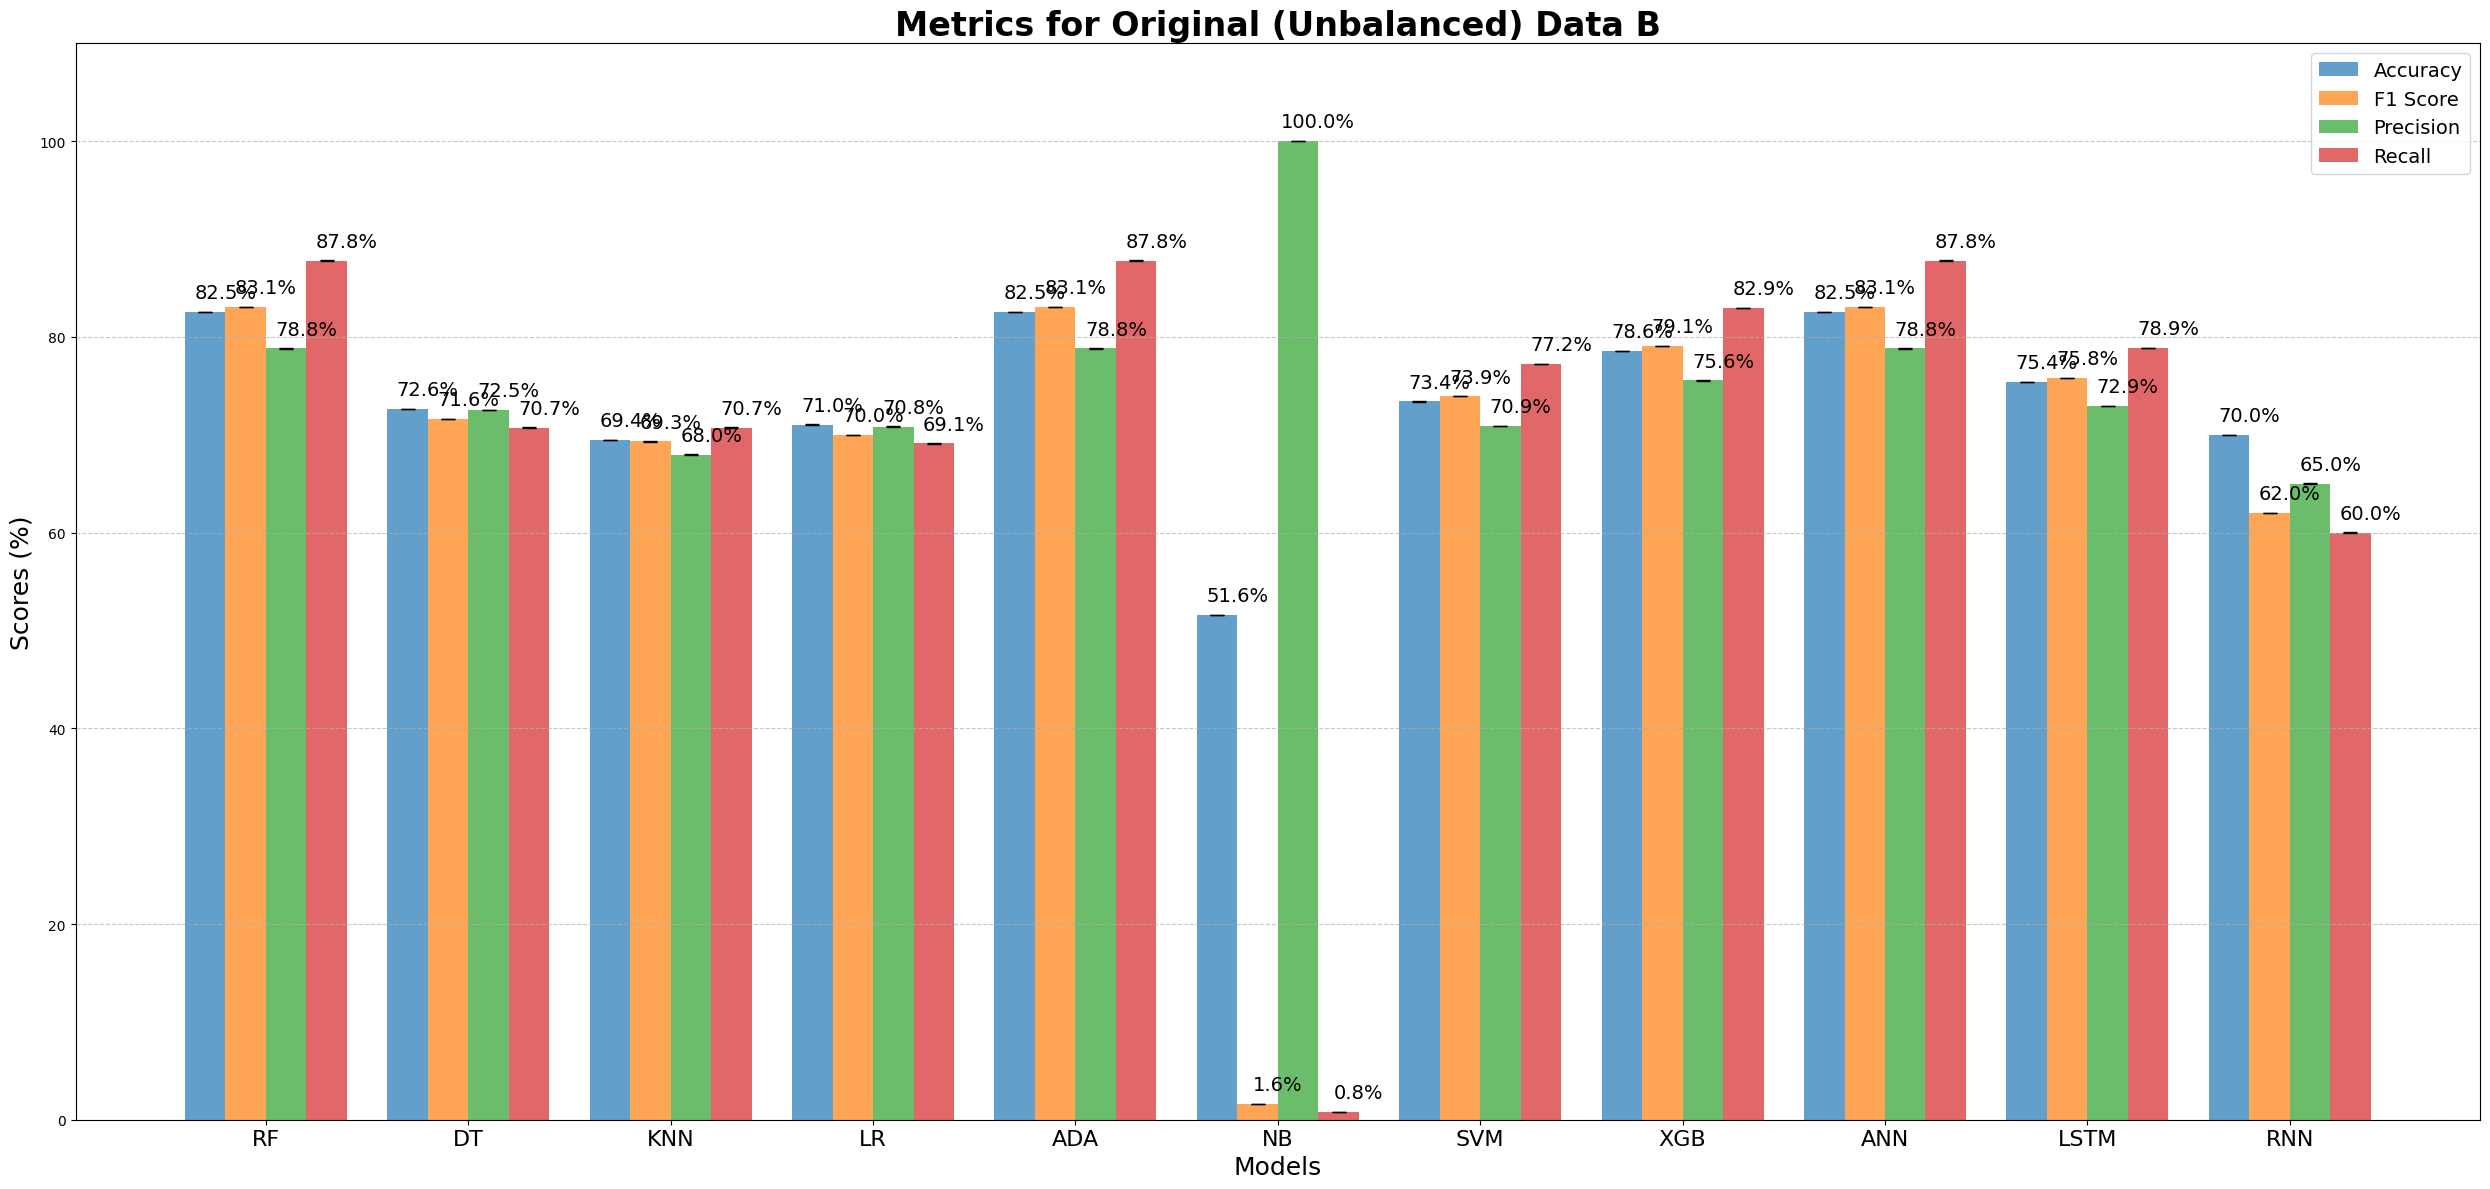

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Metrics (%)
accuracy = [82.54, 72.62, 69.44, 71.03, 82.54, 51.59, 73.41, 78.57, 82.54, 75.40, 70.0]
precision = [78.83, 72.5, 67.97, 70.83, 78.83, 100.0, 70.90, 75.56, 78.83, 72.93, 65.0]
recall = [87.80, 70.73, 70.73, 69.11, 87.80, 0.81, 77.24, 82.93, 87.80, 78.86, 60.0]
f1_score = [83.08, 71.60, 69.32, 69.96, 83.08, 1.61, 73.93, 79.07, 83.08, 75.78, 62.0]

# Error bars
error_accuracies = [0.02]*11
error_precisions = [0.02]*11
error_recalls = [0.02]*11
error_f1_scores = [0.02]*11

metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar positions
x = np.arange(len(models))
total_width = 0.8
n_metrics = len(metrics)
width = total_width / n_metrics  # width of each bar

# Plot
fig, ax = plt.subplots(figsize=(25, 12))

for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    ax.bar(x + i*width, metric, width, label=label, yerr=errors, capsize=5, alpha=0.7, ecolor='black')

    # Add value labels on top of bars
    for j, value in enumerate(metric):
        ax.text(x[j] + i*width + width/2, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=14, rotation=0)

# Styling
ax.set_title('Metrics for Original (Unbalanced) Data B', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=18)
ax.set_ylabel('Scores (%)', fontsize=18)
ax.set_xticks(x + total_width/2 - width/2)
ax.set_xticklabels(models, fontsize=16)
ax.set_ylim(0, 110)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=14)

plt.tight_layout()
plt.savefig('Metrics_for_Original_Unbalanced_Data_B.pdf', bbox_inches='tight')
plt.show()


In [63]:
df.iny = df['treatment']   # lowercase 't'

/tmp/ipython-input-700777851.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.iny = df['treatment']   # lowercase 't'


In [64]:
df.columns = df.columns.str.lower()
y = df['treatment']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        1259 non-null   int64
 1   gender                     1259 non-null   int64
 2   country                    1259 non-null   int64
 3   state                      1259 non-null   int64
 4   self_employed              1259 non-null   int64
 5   family_history             1259 non-null   int64
 6   treatment                  1259 non-null   int64
 7   work_interfere             1259 non-null   int64
 8   no_employees               1259 non-null   int64
 9   remote_work                1259 non-null   int64
 10  tech_company               1259 non-null   int64
 11  benefits                   1259 non-null   int64
 12  care_options               1259 non-null   int64
 13  wellness_program           1259 non-null   int64
 14  seek_help               

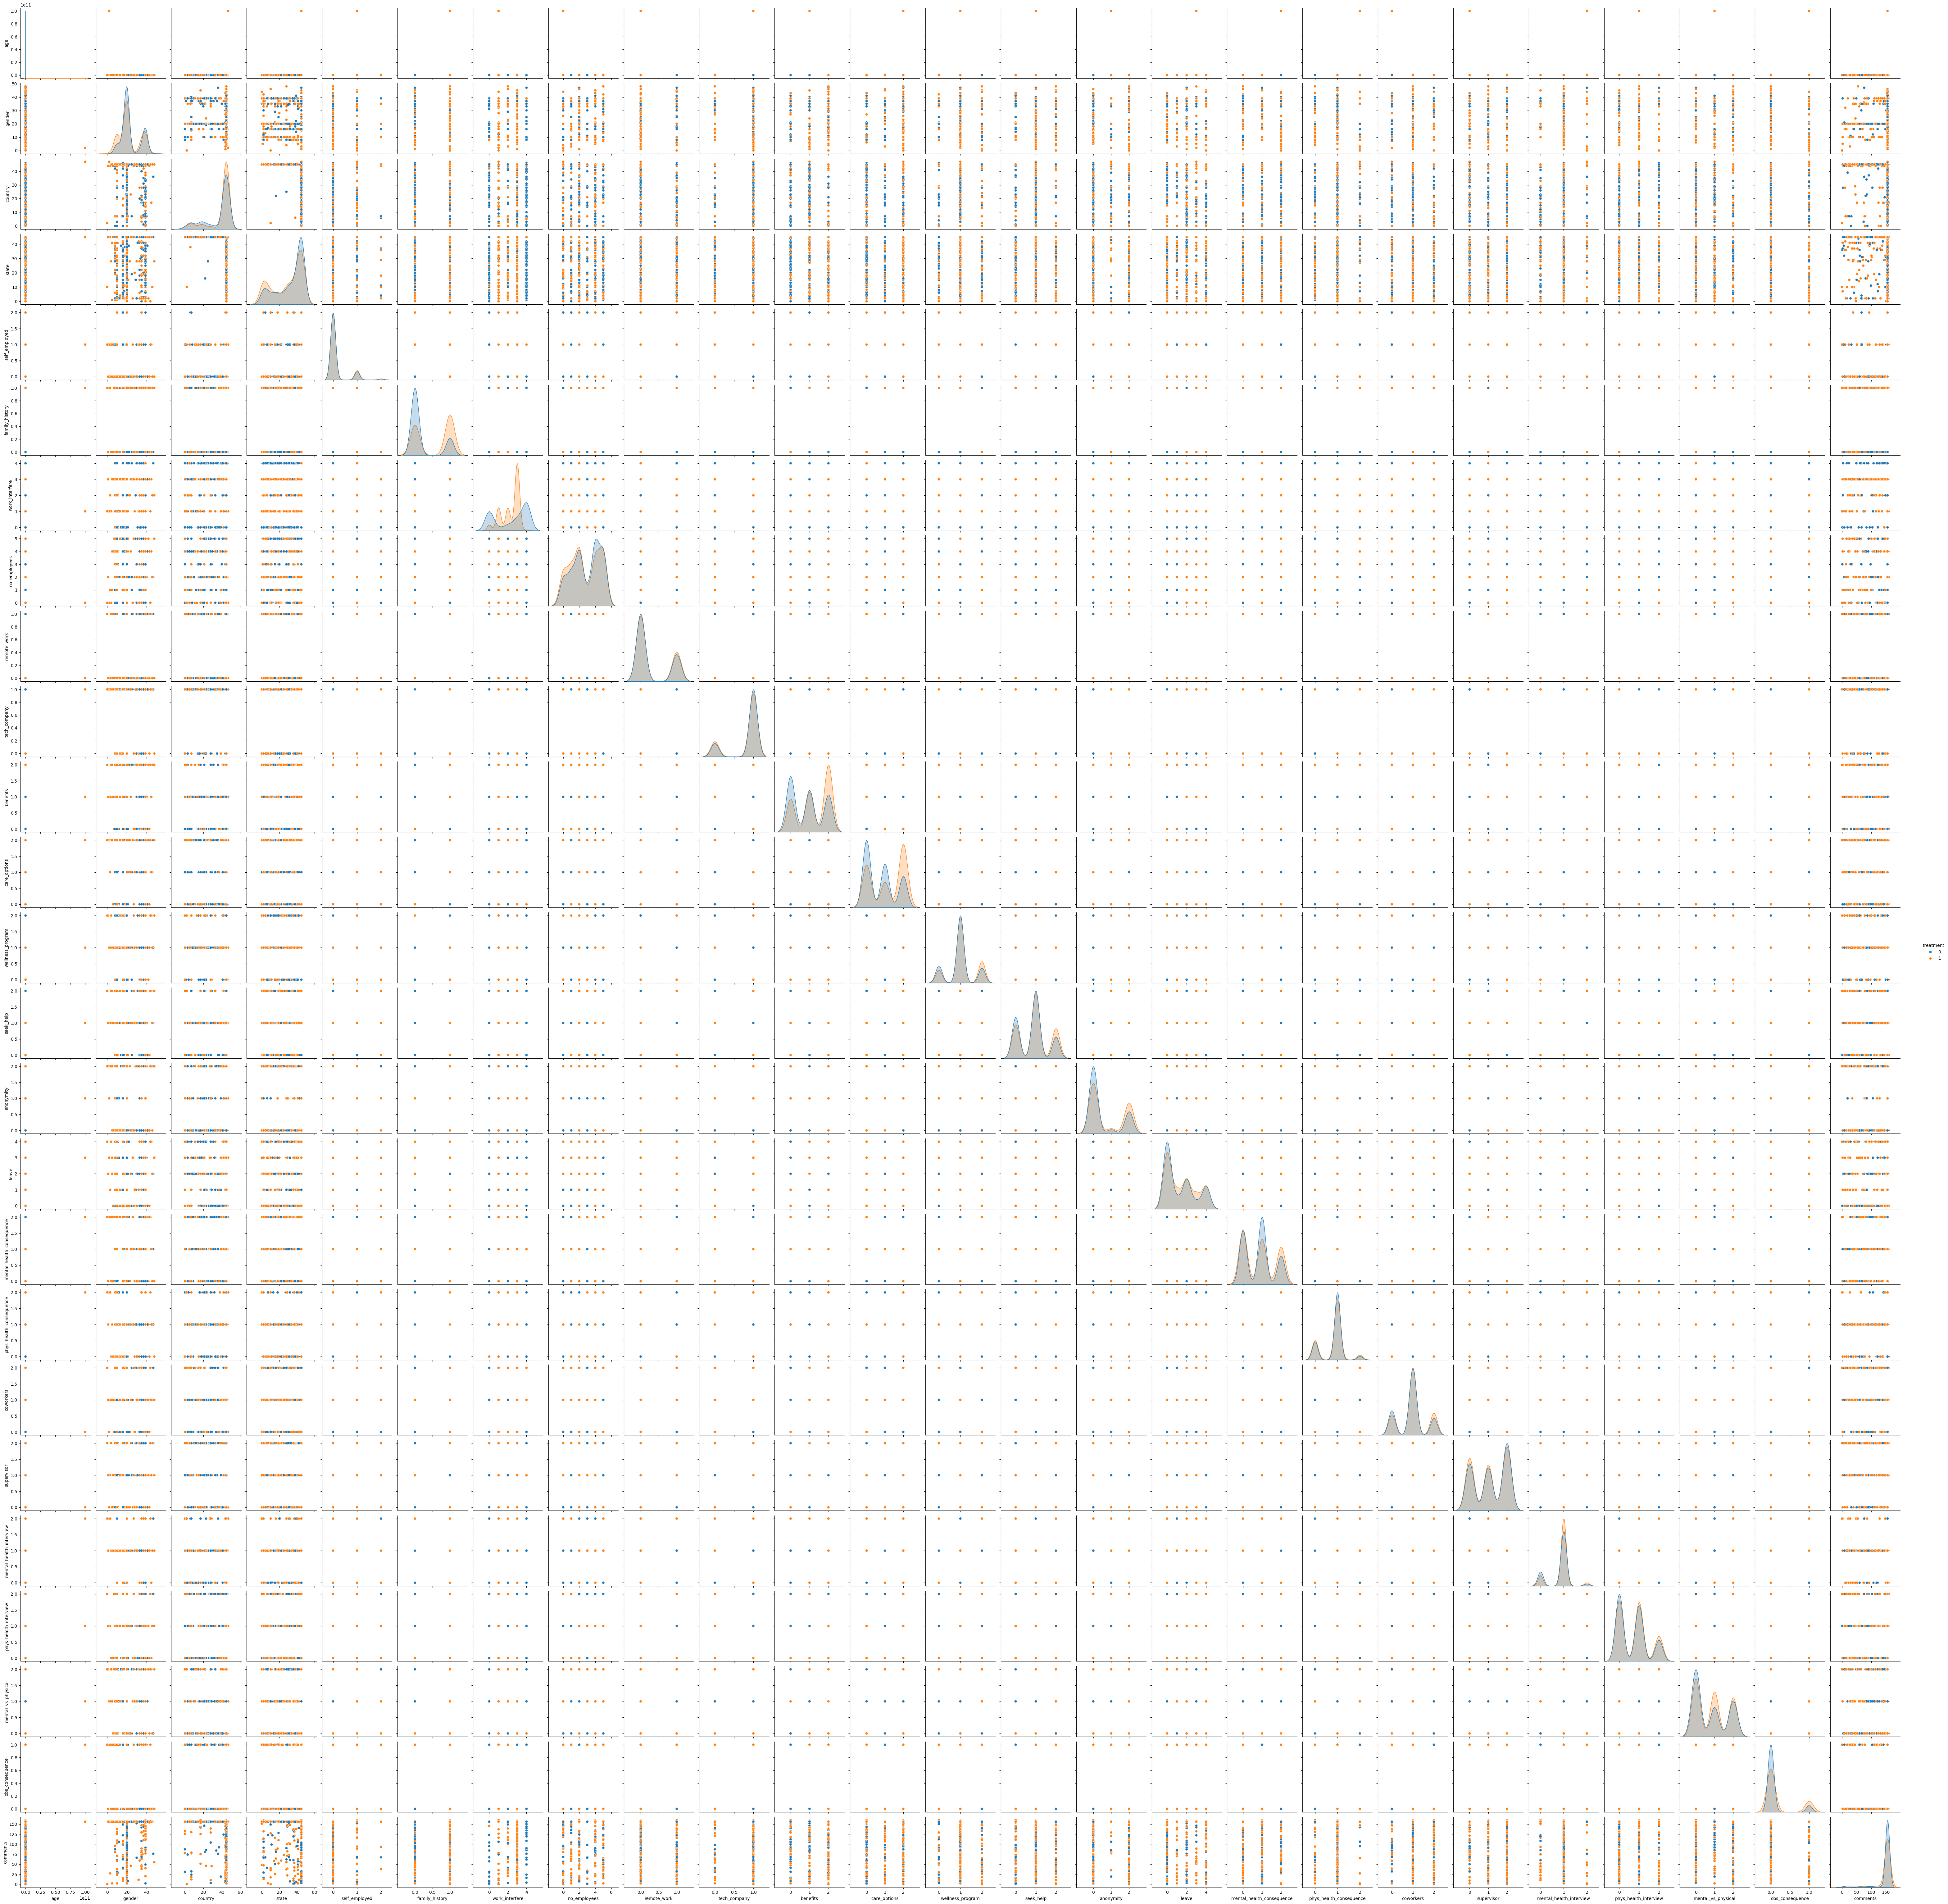

In [65]:
df.info()
sns.pairplot(df, hue = 'treatment')

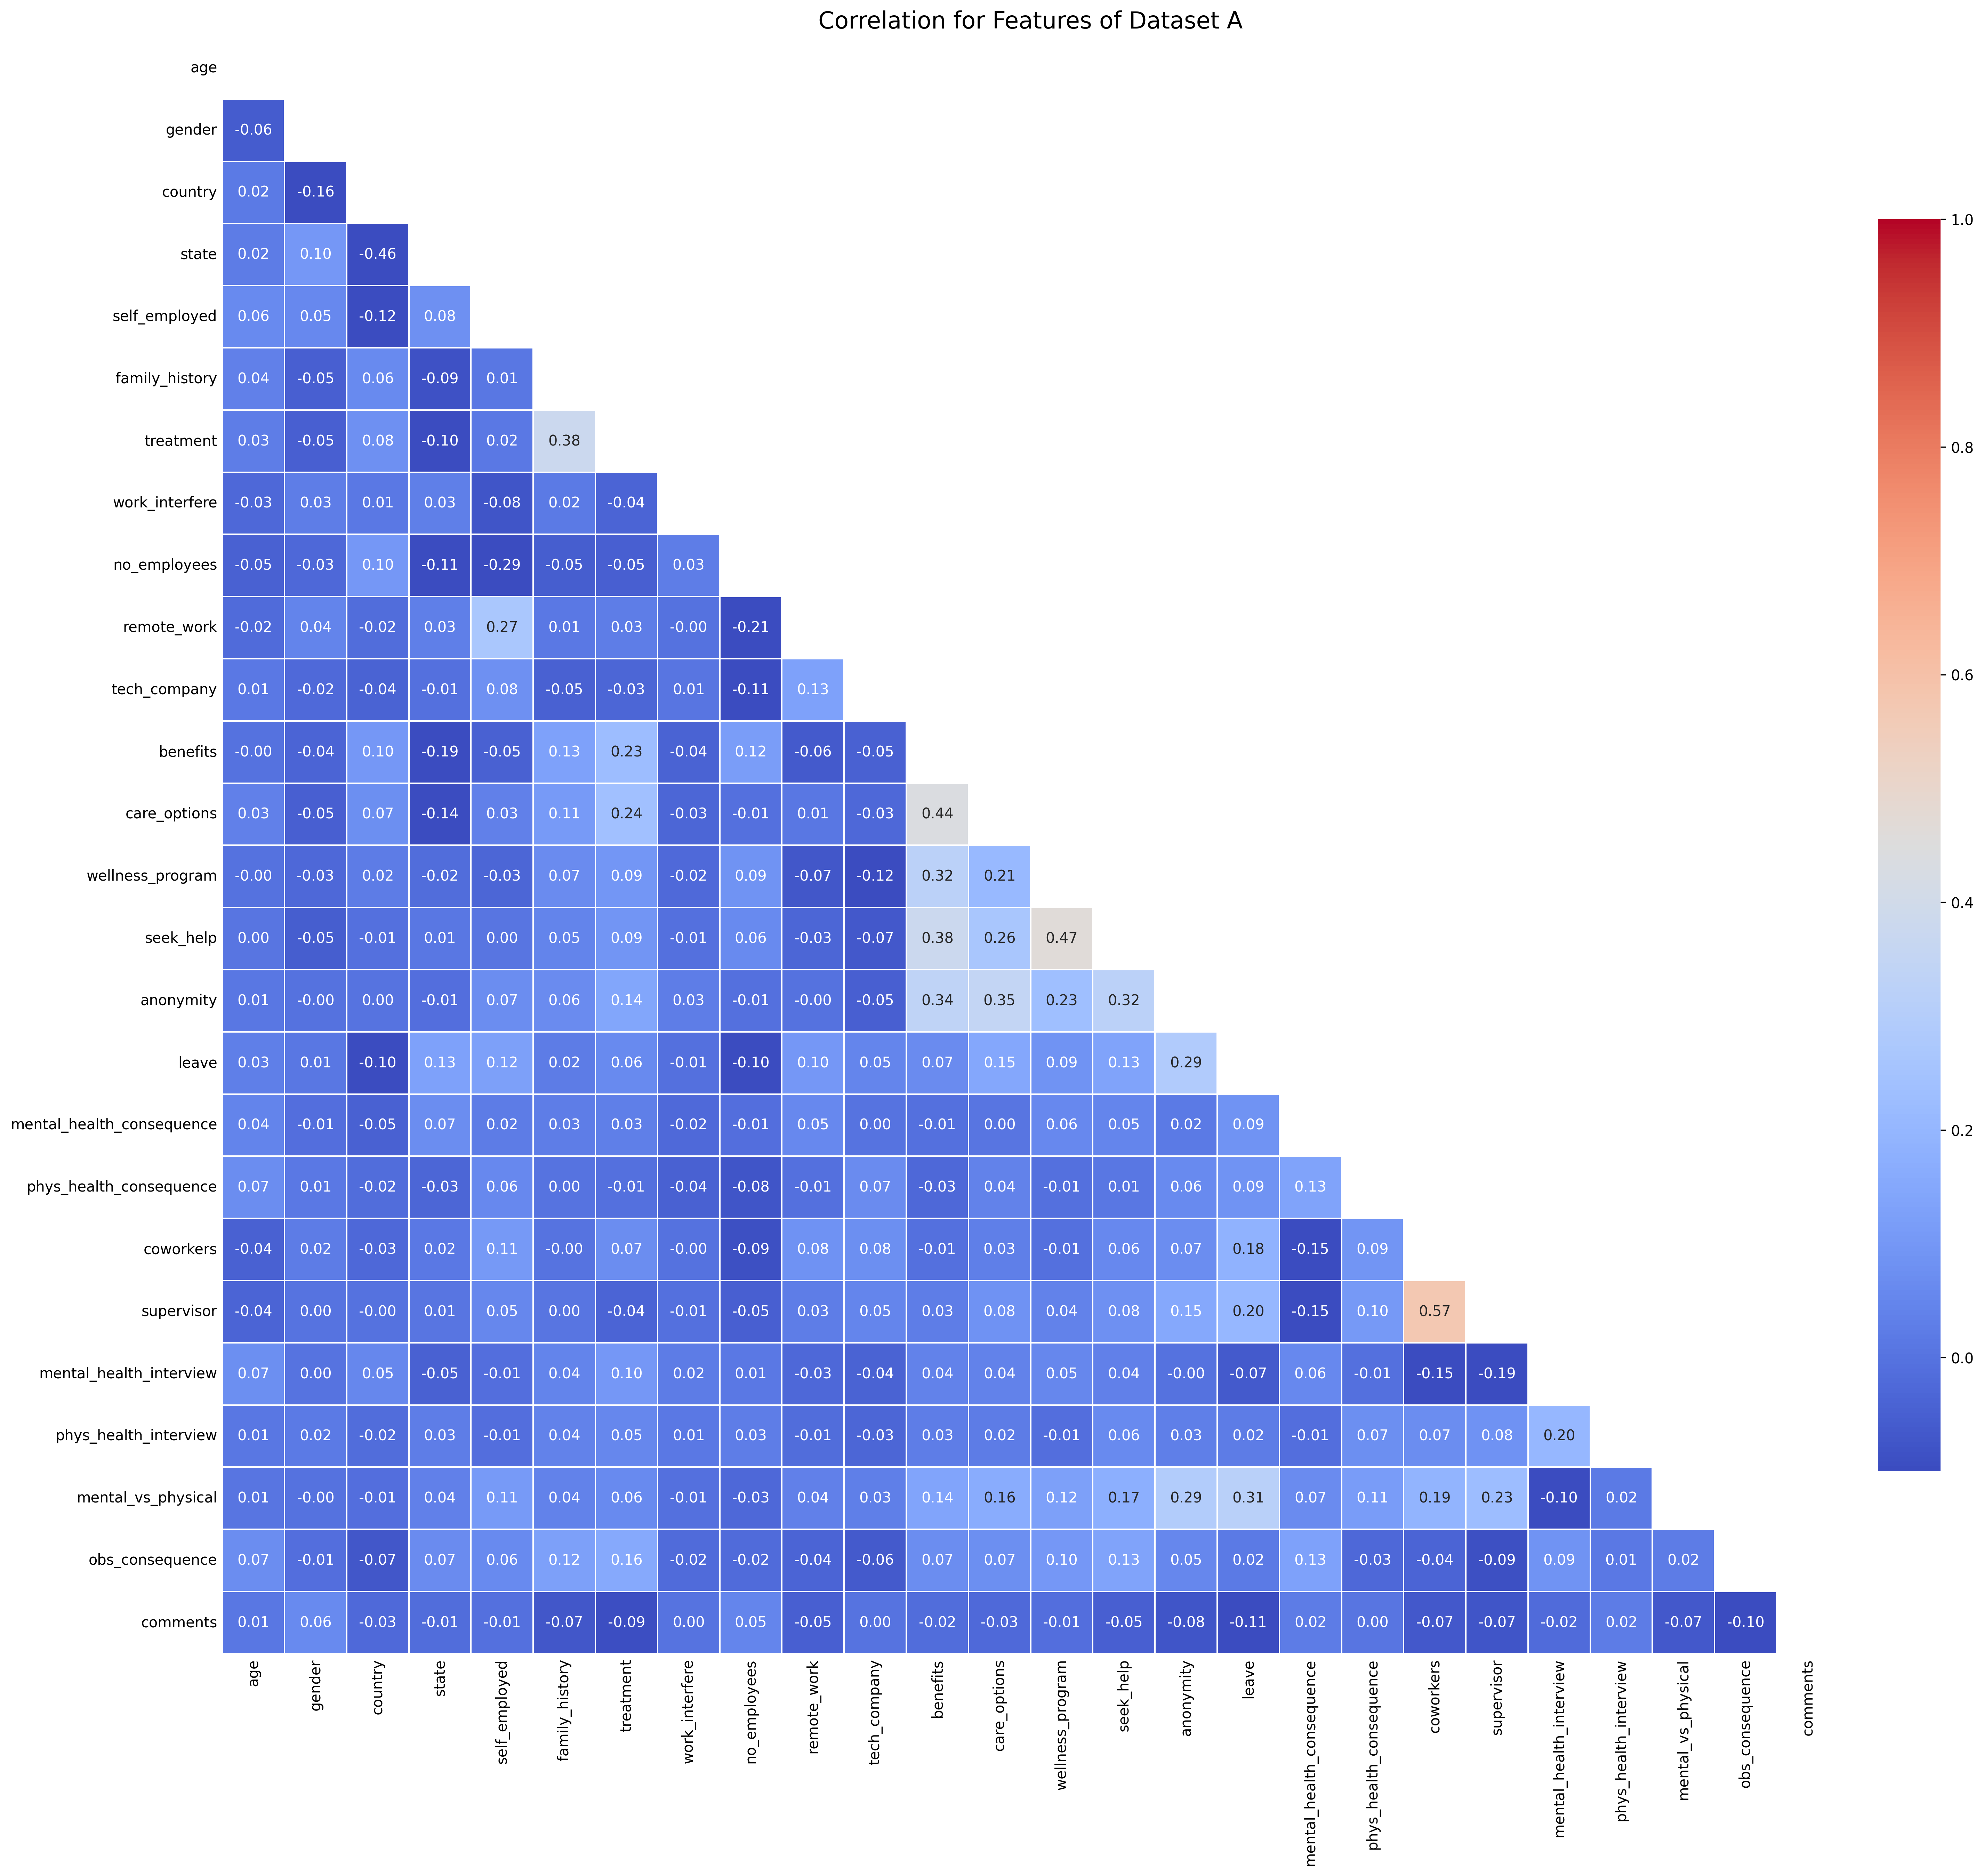

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation
corr = df.corr()

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Figure setup
plt.figure(figsize=(21, 21), dpi=300)

# Draw heatmap
sns_plot = sns.heatmap(
    corr, mask=mask, vmin=-0.1, vmax=1.0,
    annot=True, fmt=".2f", cmap='coolwarm',
    square=True, linewidths=0.9,
    cbar_kws={"shrink": 0.6, "pad": 0.02}
)

# Hide ticks
sns_plot.tick_params(axis='x', length=0)
sns_plot.tick_params(axis='y', length=0)

# Title
plt.title("Correlation for Features of Dataset A", fontsize=16)

# Save and show
plt.tight_layout()
plt.savefig("Correlation_for_Features_of_Dataset_A.pdf", bbox_inches='tight')
plt.show()


In [68]:
X_res = df.drop(columns=['treatment'])
y_res = df['treatment']

In [69]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Split Information==
def split_information(X_res, feature):
    value_counts = X_res[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Gain Ratio
def gain_ratio(X_res, y_res, feature):
    ig = information_gain(X_res, y_res, feature)
    si = split_information(X_res, feature)
    return ig / (si + 1e-9)

# Compute Gain Ratios for all features
gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
gain_ratio_results = pd.DataFrame(gain_ratios.items(), columns=['Feature', 'Gain Ratio'])
gain_ratio_results = gain_ratio_results.sort_values(by="Gain Ratio", ascending=False)

# Display the results
print(gain_ratio_results)

                      Feature  Gain Ratio
6              work_interfere    0.183138
5              family_history    0.110225
24                   comments    0.084826
11               care_options    0.035514
23            obs_consequence    0.030347
1                      gender    0.023906
10                   benefits    0.023842
2                     country    0.020384
14                  anonymity    0.013302
3                       state    0.011092
20    mental_health_interview    0.008561
15                      leave    0.008553
16  mental_health_consequence    0.008293
0                         age    0.006928
22         mental_vs_physical    0.006536
12           wellness_program    0.005318
13                  seek_help    0.004269
18                  coworkers    0.002562
7                no_employees    0.002057
17    phys_health_consequence    0.001906
21      phys_health_interview    0.001323
9                tech_company    0.001052
19                 supervisor    0

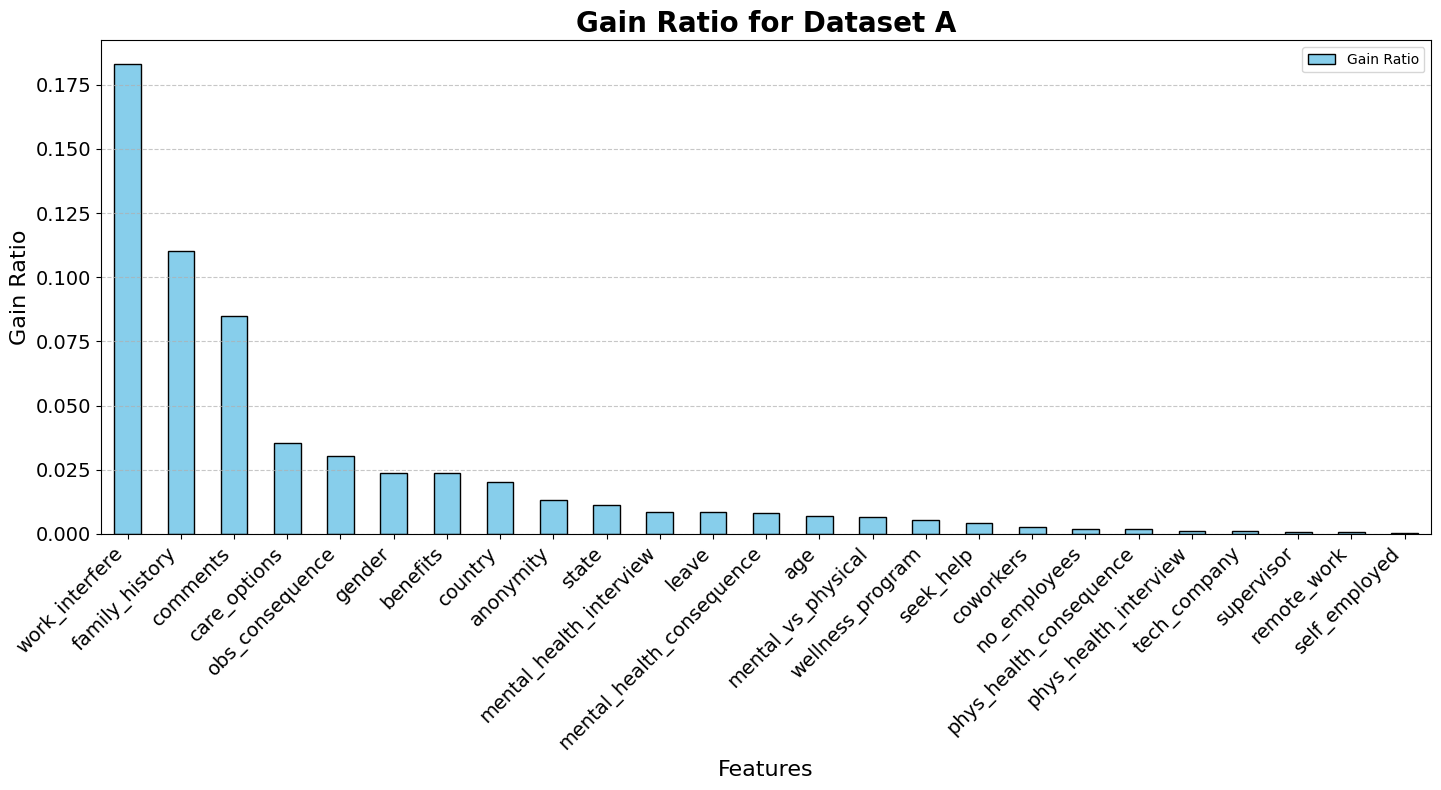

In [70]:
# Plotting the gain ratios
plt.figure(figsize=(28, 8))
ax1 = plt.subplot(1, 2, 1)
gain_ratio_results.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Gain Ratio for Dataset A', fontsize=20, fontweight='bold')
ax1.set_xlabel('Features', fontsize=16)
ax1.set_ylabel('Gain Ratio', fontsize=16)
ax1.set_xticklabels(gain_ratio_results['Feature'], rotation=45, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)  # Correct way to set y-tick label size
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Gain Ratio for Dataset A.pdf") # save figure
plt.show()


In [71]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Information Gains for all features
information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
information_gain_results = pd.DataFrame(information_gains.items(), columns=['Feature', 'Information Gain'])
information_gain_results = information_gain_results.sort_values(by="Information Gain", ascending=False)

# Display the results
print(information_gain_results)


                      Feature  Information Gain
6              work_interfere          0.400749
24                   comments          0.127863
5              family_history          0.106400
1                      gender          0.061252
11               care_options          0.055365
2                     country          0.049712
3                       state          0.040389
10                   benefits          0.037611
0                         age          0.033323
23            obs_consequence          0.018212
15                      leave          0.017442
14                  anonymity          0.015227
16  mental_health_consequence          0.012849
22         mental_vs_physical          0.010048
20    mental_health_interview          0.007313
12           wellness_program          0.006621
13                  seek_help          0.006293
7                no_employees          0.005031
18                  coworkers          0.003447
21      phys_health_interview          0

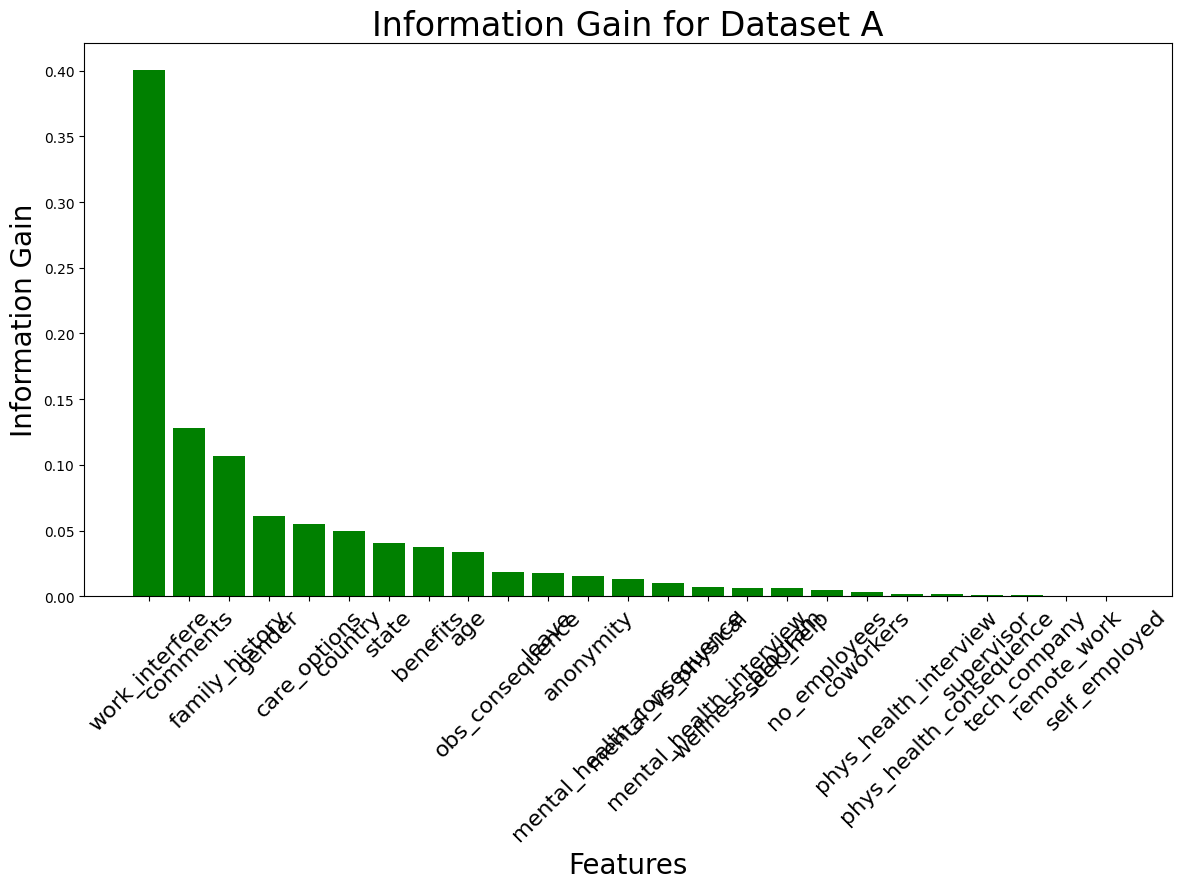

In [72]:
import matplotlib.pyplot as plt

ig_df = information_gain_results.reset_index(drop=True)  # Reset index for clean plotting
ig_df.columns = ['Feature', 'IG']  # Rename columns for convenience

# Plot the Information Gain
plt.figure(figsize=(12, 9))
plt.bar(ig_df['Feature'], ig_df['IG'], color='green')
plt.xlabel('Features', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel('Information Gain', fontsize=20)
plt.title('Information Gain for Dataset A', fontsize=24)
plt.tight_layout()  # To ensure proper spacing for labels

# Save the plot as a PDF file
plt.savefig("Information Gain for Dataset A.pdf", bbox_inches='tight')

# Display the plot
plt.show()